<a href="https://colab.research.google.com/github/areummon/uni_projects/blob/main/Practica05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!gdown 1lmh4VMbV3ENHR3kU-_tOv-QdaLthgqAN

Downloading...
From: https://drive.google.com/uc?id=1lmh4VMbV3ENHR3kU-_tOv-QdaLthgqAN
To: /content/weather_forecast_data.csv
100% 251k/251k [00:00<00:00, 42.0MB/s]


Modelo de Clasificación

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


data = pd.read_csv('weather_forecast_data.csv')

X = data.iloc[:,0:5].values
Y = data.iloc[:,5].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state= 42)

dt = DecisionTreeClassifier(
    max_depth=8,
    random_state=42
)

dt.fit (X_train, Y_train)

y_pred = dt.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print('Accuracy: ', accuracy)

Accuracy:  1.0


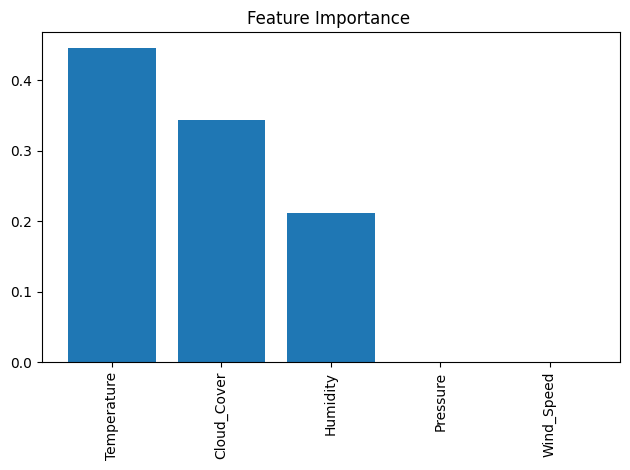

In [ ]:
importances = dt.feature_importances_ # Se obtiene la importancia de cada feature
sorted_indices = np.argsort(importances)[::-1] # Se ordenan en orden descendente
names = data.columns[0:5] # Se obtienen los nombres de los features

plt.title('Feature Importance ')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), names[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

Modelo de Regresión

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

poly = PolynomialFeatures(degree=8)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

Y_train[Y_train == 'rain'] = 1
Y_train[Y_train == 'no rain'] = 0
Y_test[Y_test == 'rain'] = 1
Y_test[Y_test == 'no rain'] = 0

model = LinearRegression()
model.fit(X_train_poly, Y_train)
Y_pred = model.predict(X_test_poly)

accuracy = r2_score(Y_test, Y_pred)
print("Accuracy con el R2 Score:", accuracy)

Accuracy con el R2 Score: 0.8055422794413257
